<a href="https://colab.research.google.com/github/jdcneto/Fundamentals-of-Computer-Vision/blob/main/Filtros_de_Realce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas 

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Download da Imagem

In [68]:
import urllib.request
try:
  urllib.request.urlretrieve("https://github.com/jdcneto/Fundamentals-of-Computer-Vision/raw/main/dados/cameraman.tiff", "cameraman.tiff")
except:
    print('Error')

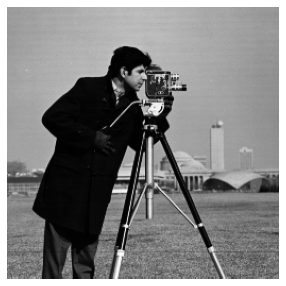

In [69]:
img = cv2.imread('cameraman.tiff', cv2.IMREAD_GRAYSCALE)
img = img.astype(int) 
plt.figure(figsize=[5,5])
plt.imshow(img, cmap = 'gray')
plt.axis('off');

## 1. Derivada de imagens e Realce

### A. Calculando diretamentere as diferenças entre pixels adjacentes

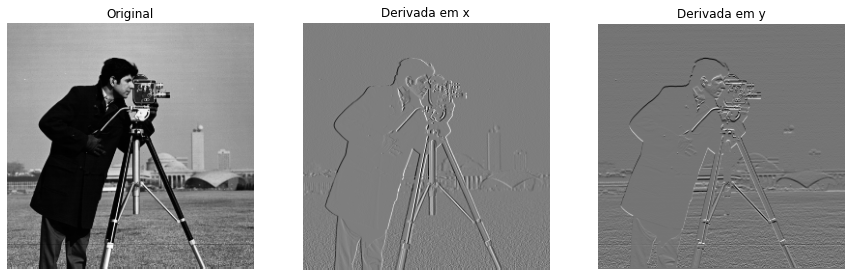

In [70]:
num_rows, num_cols = img.shape
# Derivada na direção x
img_dx = np.zeros((num_rows, num_cols-1))    
img_dx = np.diff(img, axis=1)

# Derivada na direção y
img_dy = np.zeros((num_rows-1, num_cols))
img_dy = np.diff(img, axis=0)
        
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_dx, 'gray')
plt.title('Derivada em x'), plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_dy, 'gray')
plt.title('Derivada em y'), plt.axis('off');

Note que a derivada possui tantos valores negativos quantos positivos. Portanto, na visualização acima o valor mais negativo da imagem é mapeado para a cor preta, e o valor mais positivo para a cor branca. Com isso, pixels possuindo derivada zero (regiões uniformes da imagem, como o céu) são mapeados para uma cor intermediária, o cinza. 

#### Histograma das imagens:

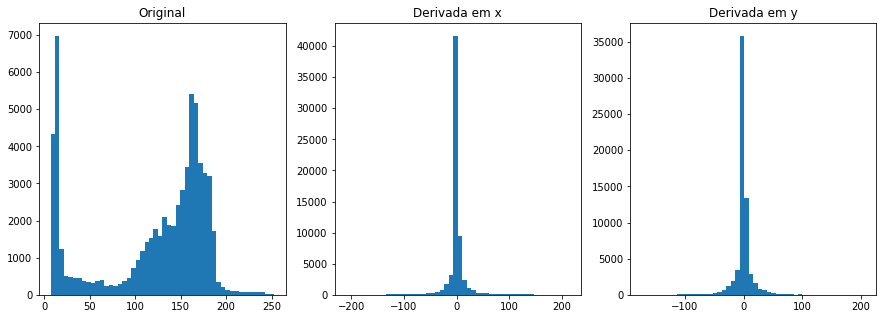

In [71]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.hist(img.flatten(), 50)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.hist(img_dx.flatten(), 50)
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.hist(img_dy.flatten(), 50)
plt.title('Derivada em y');

#### Magnitude do gradiente

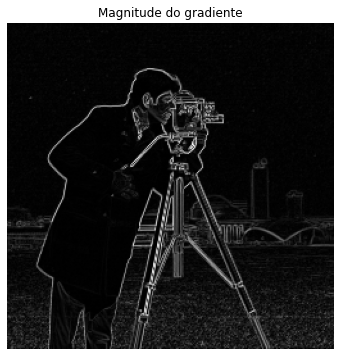

In [72]:
img_grad_mag = np.zeros((num_rows-1, num_cols-1))
for col in range(num_cols-1):
    for row in range(num_rows-1):
        img_grad_mag[row, col] = np.sqrt(img_dx[row,col]**2+img_dy[row, col]**2)
# Utilizando o numpy, o loop aninhado acima pode ser substituído por
#img_grad_mag = np.sqrt(img_dx[:-1]**2+img_dy[:, :-1]**2)
# Os índices :-1 acima são necessários porque os arrays possuem tamanhos diferentes
plt.figure(figsize=[6,6])
plt.imshow(img_grad_mag, 'gray')
plt.title('Magnitude do gradiente'), plt.axis('off');

### B. Derivada utilizando convolução e o filtro derivada simples

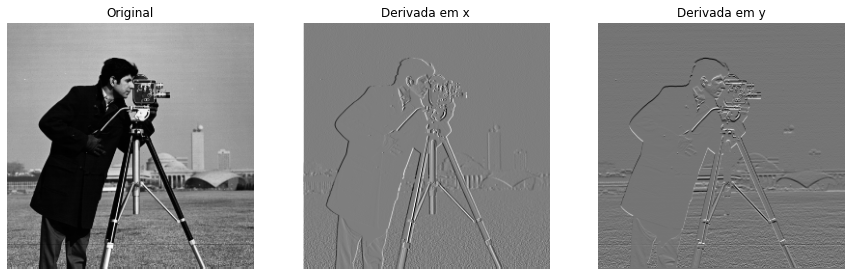

In [73]:
from scipy.signal import convolve

# Filtros derivada
wx = np.array([[1, -1]])
wy = np.array([[1],
               [-1]])
img_dx_conv = convolve(img, wx, mode='same')
img_dy_conv = convolve(img, wy, mode='same')

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original'), plt.axis('off');
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv, 'gray')
plt.title('Derivada em x'), plt.axis('off');
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv, 'gray')
plt.title('Derivada em y'), plt.axis('off');

### C. Utilizando o filtro de Sobel  
Operação usada para realçar contornos em imagens. Esse filtro
não linear realça linhas verticais e horizontais mais escuras que o
fundo, sem realçar pontos isolados. 

In [74]:
img = cv2.imread('cameraman.tiff', 0)
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize = 3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = 3)

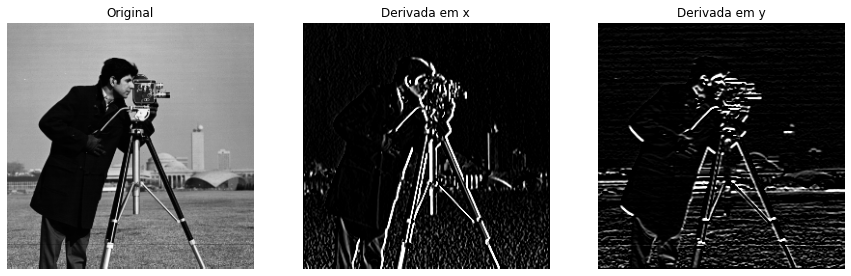

In [75]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(sobelx, 'gray')
plt.title('Derivada em x'), plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(sobely, 'gray')
plt.title('Derivada em y'), plt.axis('off');

#### Visualização do gradiente em uma dada região da imagem

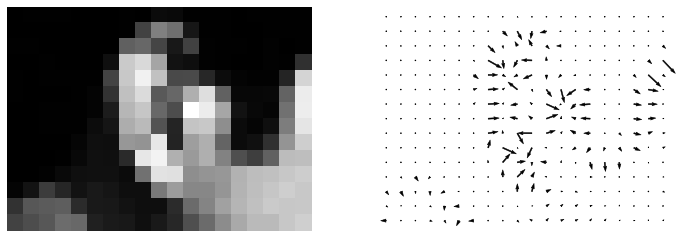

In [76]:
def view_gradient(img, img_dx, img_dy, region):
    
    Y, X = np.mgrid[region[0]:region[1], region[2]:region[3]]
    Y = Y[::-1]
    img_region = img[region[0]:region[1], region[2]:region[3]]
    img_dx_region = img_dx[region[0]:region[1], region[2]:region[3]]
    img_dy_region = img_dy[region[0]:region[1], region[2]:region[3]]
    
    plt.figure(figsize=[12, 6])
    plt.subplot(1, 2, 1, aspect='equal')
    plt.pcolormesh(X, Y, img_region, cmap='gray'), plt.axis('off');
    plt.subplot(1, 2, 2, aspect='equal')
    plt.quiver(X, Y, img_dx_region, -img_dy_region, edgecolor='k', facecolor='k', 
               linewidth=.5, scale=3e3), plt.axis('off');

region = [55,70,100,120]    # [first row, last row, first column, last column]
view_gradient(img, img_dx_conv, img_dy_conv, region);


### D.  O Laplaciano  

Ele possui uma máscara de ordem 3, que percorre toda a imagem alterando o pixel-alvo pela média ponderada dos pixels vizinhos, e depois eleva ao quadrado o valor obtido. O operador laplaciano tende a produzir bordas mais finas comparado ao filtro de Sobel, entretanto, tem como ponto negativo a sensibilidade ao ruído por ser mais eficaz no realçe detalhes finos.

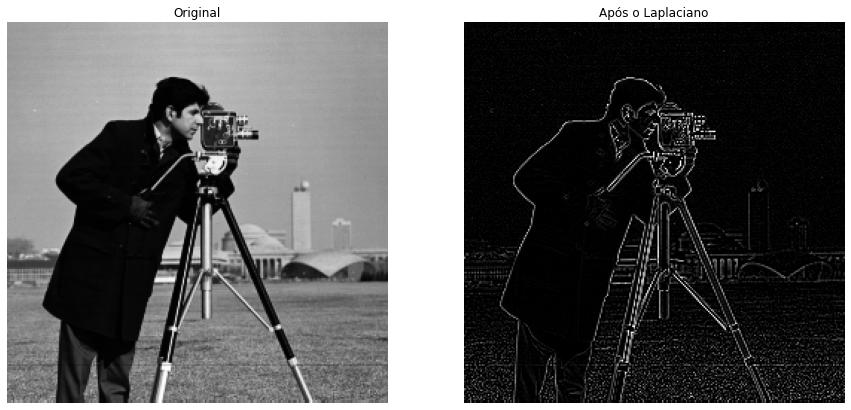

In [77]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(laplacian, 'gray')
plt.title('Após o Laplaciano')
plt.axis('off');


### E.  Filtro de Canny  

O filtro de Canny é bastante famoso por sua eficiência como algoritmo para detectar bordas em imagens. Baseia-se no fato que   
1 - O algoritmo deve ser capaz de identificar todas as bordas possíveis;   
2 - Todas as bordas detectadas devem estar próximas das bordas originais da imagem;   
3 - Bordas falsas não podem ser criadas, ou seja, cada borda deve ser definida uma única vez.

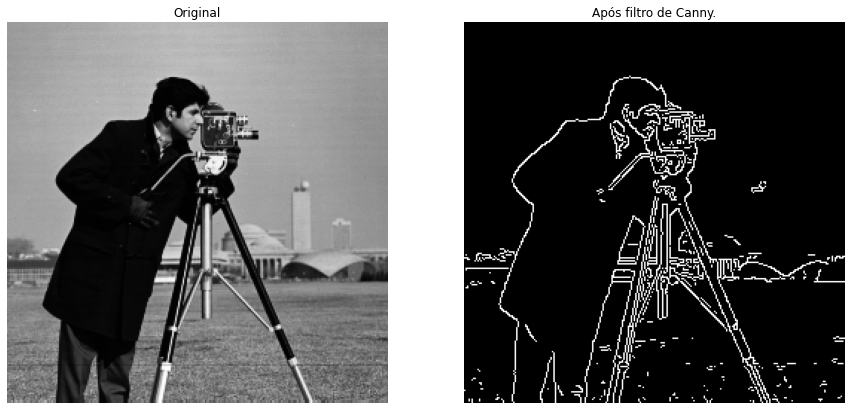

In [78]:
canny = cv2.Canny(img, 200, 250)

plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(canny, 'gray')
plt.title('Após filtro de Canny.')
plt.axis('off');